In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [4]:
data=pd.read_csv("delivery_time.csv")

In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.shape

(21, 2)

# **EDA AND VISUALISATIONS**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


There are no null values in the given data

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

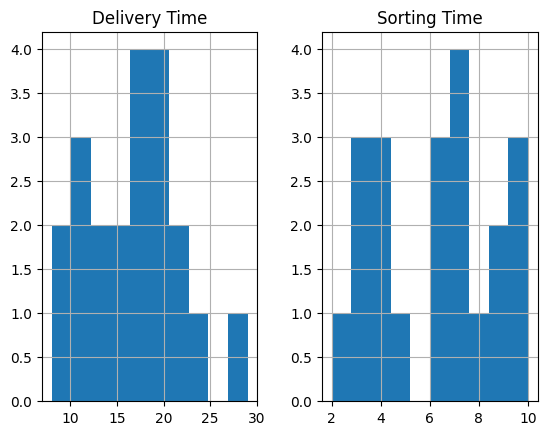

In [13]:
data.hist()

<Axes: >

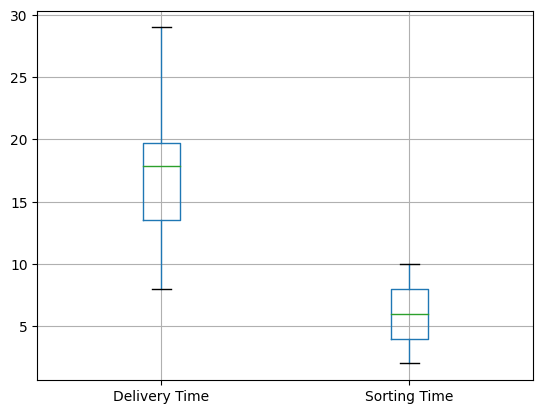

In [21]:
# check for outliers in the data
data.boxplot()
#there are no outliers in the data

In [16]:
# check for outliers ==> statistical method
# IQR = Q3- Q1
IQR1 = data.describe().iloc[6][0] - data.describe().iloc[4][0]
max_11=data.describe().iloc[6][0] + 1.5* IQR1
min_11=data.describe().iloc[4][0] - 1.5* IQR1

print(f'minimum and maximum allowed range is between ({min_11}, {max_11})')

if data.iloc[:,0].max() < max_11 and data.iloc[:,0].min() > min_11:
  print('there is no outliers in Delivery Time column')
else:
  print('there are outliers, please treat it')

minimum and maximum allowed range is between (4.125, 29.125)
there is no outliers in Delivery Time column


In [18]:
 #IQR = Q3- Q1
IQR2 = data.describe().iloc[6][1] - data.describe().iloc[4][1]
max_12=data.describe().iloc[6][1] + 1.5* IQR1
min_12=data.describe().iloc[4][1] - 1.5* IQR1

print(f'minimum and maximum allowed range is between ({min_12}, {max_12})')

if data.iloc[:,1].max() < max_12 and data.iloc[:,1].min() > min_12:
  print('there is no outliers in Sorting Time column')
else:
  print('there are outliers, please treat it')

minimum and maximum allowed range is between (-5.375, 17.375)
there is no outliers in Sorting Time column


In [15]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

**as there is no outlier in any column and whole data is all clean, there is no need of EDA process to perform, so we can proceed to build linear regression model**

In [22]:
y=data[['Delivery Time']]
X=data[['Sorting Time']]

Text(0, 0.5, 'Delivery_time')

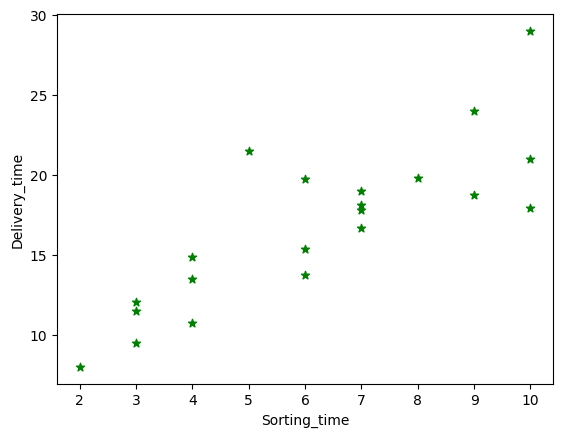

In [23]:
plt.scatter(X,y,color='green',marker='*')
plt.xlabel('Sorting_time')
plt.ylabel('Delivery_time')

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=170)

In [98]:
X_train.head()

,Sorting Time,Sorting Time
3,9,81
18,2,4
16,6,36
13,3,9
2,6,36


In [100]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [101]:
y_pred=lreg.predict(X_test)
y_pred

array([11.80923077, 11.80923077, 21.43504274, 13.41353276, 21.43504274])

In [102]:
y_test, y_pred

(13    11.50
 14    12.03
 3     24.00
 11    10.75
 9     18.75
 Name: Delivery Time, dtype: float64,
 array([11.80923077, 11.80923077, 21.43504274, 13.41353276, 21.43504274]))

In [103]:
from sklearn.metrics  import r2_score
score_train=r2_score(y_train,lreg.predict(X_train))
score_test=r2_score(y_test,y_pred)
score_train, score_test

(0.6118377845688049, 0.842341166745328)

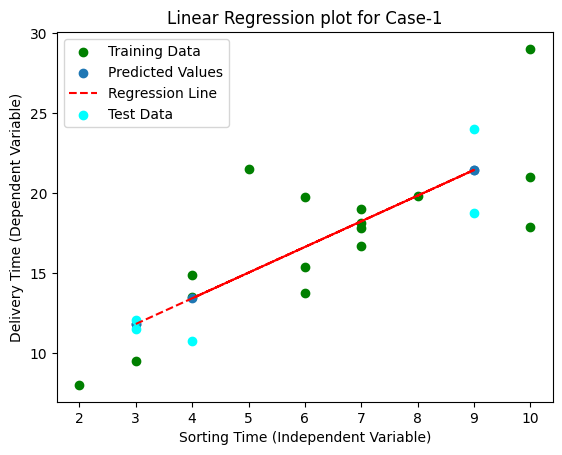

In [104]:
plt.scatter(X_train, y_train, c='g', label='Training Data')
plt.scatter(X_test, y_pred, label='Predicted Values')
plt.plot(X_test, y_pred, '--r', label='Regression Line')
plt.scatter(X_test, y_test, c='cyan', label='Test Data')
plt.xlabel('Sorting Time (Independent Variable)')
plt.ylabel('Delivery Time (Dependent Variable)')
plt.title('Linear Regression plot for Case-1')
plt.legend()

**Transformation based on scaling**

In [105]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [106]:
# Simple Linear Model Accuracy based on Standard
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

lreg.fit(X_train, y_train)

y_pred_std_train=lreg.predict(X_train)
y_pred_std_test=lreg.predict(X_test)

score_std_train=r2_score(y_train, y_pred_std_train)
score_std_test=r2_score(y_test, y_pred_std_test)


In [107]:
# Simple Linear Model Accuracy based on Robust Scaling
X_train_rob = rob_scaler.fit_transform(X_train)
X_test_rob = rob_scaler.transform(X_test)

lreg.fit(X_train_rob, y_train)

y_pred_rob_train=lreg.predict(X_train_rob)
y_pred_rob_test=lreg.predict(X_test_rob)

score_rob_train=r2_score(y_train, y_pred_rob_train)
score_rob_test=r2_score(y_test, y_pred_rob_test)

In [108]:
# Simple Linear Model Accuracy based on Minmax scaling
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

lreg.fit(X_train_mm, y_train)

y_pred_mm_train=lreg.predict(X_train_mm)
y_pred_mm_test=lreg.predict(X_test_mm)

score_mm_train=r2_score(y_train, y_pred_mm_train)
score_mm_test=r2_score(y_test, y_pred_mm_test)

**Transformation based on logarithmic, exponential, quadratic**


In [109]:
X= data[['Sorting Time']]
y= data['Delivery Time']
X_log = np.log(X)

X_train, X_test, y_train, y_test = train_test_split(X_log,y, test_size=0.22, random_state=170)

lreg.fit(X_train, y_train)

y_pred_log_train=lreg.predict(X_train)
y_pred_log_test=lreg.predict(X_test)

score_log_train=r2_score(y_train, y_pred_log_train)
score_log_test=r2_score(y_test, y_pred_log_test)

In [110]:
X= data[['Sorting Time']]
y= data['Delivery Time']
y_log=np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_log, test_size=0.22, random_state=170)

lreg.fit(X_train, y_train)

y_pred_log_train=lreg.predict(X_train)
y_pred_exp_train=np.exp(y_pred_log_train)
y_pred_log_test=lreg.predict(X_test)
y_pred_exp_test=np.exp(y_pred_log_test)

score_exp_train=r2_score(np.exp(y_train), y_pred_exp_train)
score_exp_test=r2_score(np.exp(y_test), y_pred_exp_test)

In [111]:
X= data[['Sorting Time']]
y= data['Delivery Time']
X_square=X**2
X_quad= pd.concat([X, X_square], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_quad,y, test_size=0.22, random_state=170)

lreg.fit(X_train, y_train)

y_pred_quad_train=lreg.predict(X_train)
y_pred_quad_test=lreg.predict(X_test)

score_quad_train=r2_score(y_train, y_pred_quad_train)
score_quad_test=r2_score(y_test, y_pred_quad_test)

In [113]:
accuracy_data=pd.DataFrame({'Model':['Train_Score','Test_Score'],
                            'Simple_Model':[score_train, score_test],
                            'Standard_Scaling':[score_std_train, score_std_test],
                            'Robust_Scaling':[score_rob_train, score_rob_test],
                            'MinMax_Scaling':[score_mm_train, score_mm_test],
                            'Logarithmic_Transformation':[score_log_train, score_log_test],
                            'Exponential_Transformation':[score_exp_train, score_exp_test],
                            'Quadratic_Transformation':[score_quad_train, score_quad_test]
                            }).T

accuracy_data

Model,Train_Score,Test_Score
Simple_Model,0.611838,0.842341
Standard_Scaling,0.611838,0.842341
Robust_Scaling,0.611838,0.842341
MinMax_Scaling,0.611838,0.842341
Logarithmic_Transformation,0.639722,0.819259
Exponential_Transformation,0.56266,0.859509
Quadratic_Transformation,0.630184,0.837743


**We can consider from the above results that Simple model is giving better results but the test accuracy is greater than the train accuracy which is debatable.**

In [114]:
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [115]:
df2=pd.read_csv('Salary_Data.csv')

In [116]:
df2.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

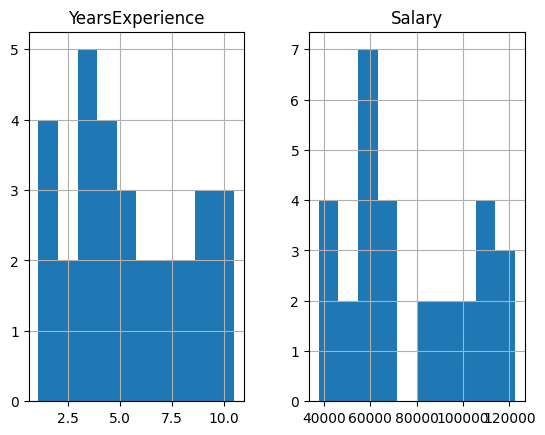

In [117]:
df2.hist()

<Axes: >

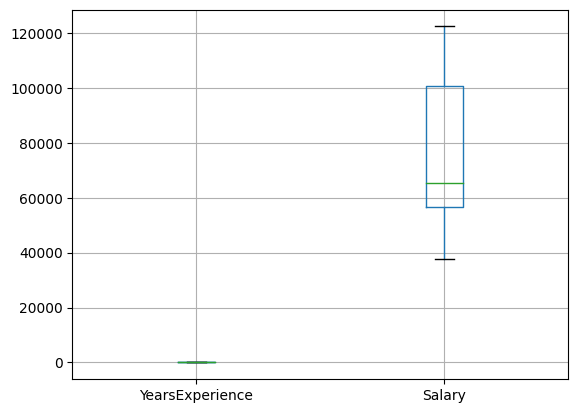

In [118]:
df2.boxplot()

<Axes: >

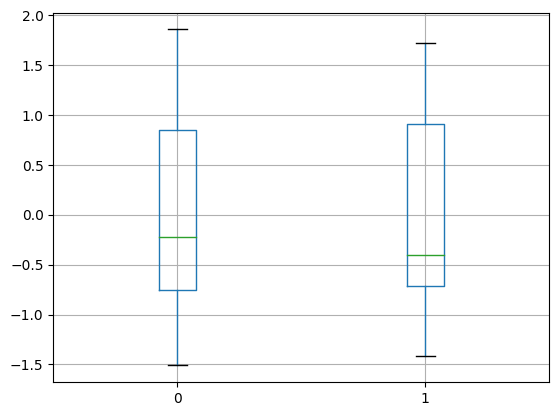

In [119]:
# perform any scaling then see box plot to get better picture

from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
nf2_std = std_scaler.fit_transform(df2)
df2_std = pd.DataFrame(nf2_std)
df2_std.boxplot()

**as there is no outlier in any column and whole data is all clean, there is no need of EDA process to perform, so we can proceed to build linear regression model**

In [120]:
# We have to find out Salary (target variable) based on YearsExperience (independent variable)
# X = YearsExperience (independent variable)
X2= df2[['YearsExperience']]
X2.head(1)

,YearsExperience
0,1.1


In [121]:
# y = Salary (target variable)
y2= df2['Salary']
y2.head(1)

0    39343.0
Name: Salary, dtype: float64

In [122]:
# Simple Linear Model Accuracy
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_train=lreg.predict(X_train)
y_pred_test=lreg.predict(X_test)

score_train=r2_score(y_train, y_pred_train)
score_test=r2_score(y_test, y_pred_test)

print(f'for my linear regression model\n Train accuracy is {score_train*100:.2f} % and \n test accuracy is {score_test*100:.2f} %')

for my linear regression model
 Train accuracy is 95.75 % and 
 test accuracy is 94.14 %


**This linear regression model is having very good accuracy**

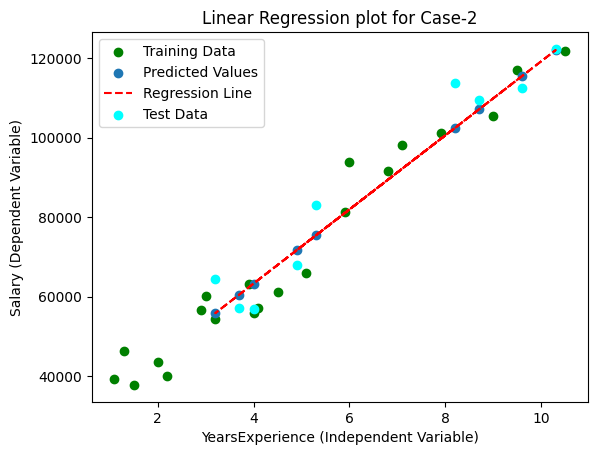

In [123]:
# Plotting
plt.scatter(X_train, y_train, c='g', label='Training Data')
plt.scatter(X_test, y_pred_test, label='Predicted Values')
plt.plot(X_test, y_pred_test, '--r', label='Regression Line')
plt.scatter(X_test, y_test, c='cyan', label='Test Data')
plt.xlabel('YearsExperience (Independent Variable)')
plt.ylabel('Salary (Dependent Variable)')
plt.title('Linear Regression plot for Case-2')
plt.legend()


**Transformation based on scaling **

In [124]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [125]:
X2= df2[['YearsExperience']]
y2= df2['Salary']
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.3, random_state=42)

# Simple Linear Model Accuracy based on Standard
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

lreg.fit(X_train_std, y_train)

y_pred_std_train=lreg.predict(X_train_std)
y_pred_std_test=lreg.predict(X_test_std)

score_std_train=r2_score(y_train, y_pred_std_train)
score_std_test=r2_score(y_test, y_pred_std_test)


In [126]:
# Simple Linear Model Accuracy based on Robust Scaling
X_train_rob = rob_scaler.fit_transform(X_train)
X_test_rob = rob_scaler.transform(X_test)

lreg.fit(X_train_rob, y_train)

y_pred_rob_train=lreg.predict(X_train_rob)
y_pred_rob_test=lreg.predict(X_test_rob)

score_rob_train=r2_score(y_train, y_pred_rob_train)
score_rob_test=r2_score(y_test, y_pred_rob_test)


In [127]:
# Simple Linear Model Accuracy based on Minmax scaling
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

lreg.fit(X_train_mm, y_train)

y_pred_mm_train=lreg.predict(X_train_mm)
y_pred_mm_test=lreg.predict(X_test_mm)

score_mm_train=r2_score(y_train, y_pred_mm_train)
score_mm_test=r2_score(y_test, y_pred_mm_test)

Transformation based on logarithmic, exponential, quadratic

In [128]:
# Logarithmic transformations

X2= df2[['YearsExperience']]
y2= df2['Salary']
X_log = np.log(X2)

X_train, X_test, y_train, y_test = train_test_split(X_log,y2, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_log_train=lreg.predict(X_train)
y_pred_log_test=lreg.predict(X_test)

score_log_train=r2_score(y_train, y_pred_log_train)
score_log_test=r2_score(y_test, y_pred_log_test)

In [129]:
# exponential transformations

X2= df2[['YearsExperience']]
y2= df2['Salary']
y_log=np.log(y2)

X_train, X_test, y_train, y_test = train_test_split(X2,y_log, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_log_train=lreg.predict(X_train)
y_pred_exp_train=np.exp(y_pred_log_train)
y_pred_log_test=lreg.predict(X_test)
y_pred_exp_test=np.exp(y_pred_log_test)

score_exp_train=r2_score(np.exp(y_train), y_pred_exp_train)
score_exp_test=r2_score(np.exp(y_test), y_pred_exp_test)

In [130]:
# quadratic transfrormations

X2= df2[['YearsExperience']]
y2= df2['Salary']
X_square=X2**2
X_quad= pd.concat([X2, X_square], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_quad,y2, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_quad_train=lreg.predict(X_train)
y_pred_quad_test=lreg.predict(X_test)

score_quad_train=r2_score(y_train, y_pred_quad_train)
score_quad_test=r2_score(y_test, y_pred_quad_test)

In [134]:
accuracy_data=pd.DataFrame({'Model':['Train_Score','Test_Score'],
                            'Simple_Model':[score_train, score_test],
                            'Standard_Scaling':[score_std_train, score_std_test],
                            'Robust_Scaling':[score_rob_train, score_rob_test],
                            'MinMax_Scaling':[score_mm_train, score_mm_test],
                            'Logarithmic_Transformation':[score_log_train, score_log_test],
                            'Exponential_Transformation':[score_exp_train, score_exp_test],
                            'Quadratic_Transformation':[score_quad_train, score_quad_test]
                            }).T
accuracy_data

,0,1
Model,Train_Score,Test_Score
Simple_Model,0.957453,0.941447
Standard_Scaling,0.957453,0.941447
Robust_Scaling,0.957453,0.941447
MinMax_Scaling,0.957453,0.941447
Logarithmic_Transformation,0.846276,0.804071
Exponential_Transformation,0.926995,0.885993
Quadratic_Transformation,0.957739,0.940545


**Simple model is predicting best so it can be used for future predictions**